#  Hello World!

###  **DSBA 6165: AI & Deep Learning**


## Goal

The goal of this lab activity is practicing the simple deep learning example to become familiar with the deep learning settings. In class, we have learned that the four key components of deep learning are 1) data, 2) model, 3) objective function, and 4) optimization algorithm. Let us review how these components work together to solve the popular MNIST problem. 

This lab adopts [TensorFlow 2 quickstart for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner) for your Hello World practice. 

## Data

Let us first load the tensorflow to get started. 

In [1]:
import tensorflow as tf
print("TF version:", tf.__version__)

import matplotlib.pyplot as plt      

2023-01-06 20:43:00.864941: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TF version: 2.11.0


Now, let us load the data. Fortunately, tf.keras embeds the MNIST dataset, so we can just use it.

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255

### Visualization of data

Let us take a look at some sample images in the dataset. The hand-written digits vary quite a lot, so it is not easy to identify the correct digits earlier, which is now quite easy problem for a simple deep learning model.   

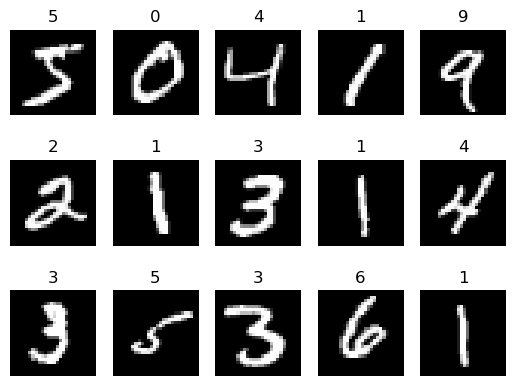

In [3]:
fig = plt.figure()
plt.tight_layout()
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("{}".format(y_train[i]))
    plt.axis('off')


## Model

NOw we build a neural network with one hidden layer and one output layer. The first [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) simply reshape the 2-dimensional image into 1-dimensional vector with all pixel values. [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) allows for stacking layers which consists of one hidden layer ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) with 128 hidden units (neurons) and ReLU activation function for nonlinear transformation and an output layer that produces 10 output values.  

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

2023-01-06 20:43:19.604301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<code>summary()</code> function creates the table that shows the network architecture. We can see that the input layer gets 784 values and pass it to the hidden layer with 128 units (with 100,480 parameters). The hidden units compute the weighted sum and apply activation function to produce 128 outputs, which are the input to the output layer. Lastly, the output layer produces 10 logit values. 

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Let us try to use the model to make predictions. We can just call the model to produce outputs and use <code>numpy()</code> to convert the output into numpy array. 


In [6]:
predictions = model(x_train[:1]).numpy()
predictions


array([[-0.5359098 ,  0.34523177, -0.31031746, -0.10942972, -0.24549435,
        -0.3606855 , -0.16559297,  0.26409328,  0.08068685,  0.57019526]],
      dtype=float32)

Hmm. It produces some outputs. Well.. Do you know what they represent? Share your thought with classmates before you move on. 

Now, why do we apply <code>softmax()</code> here? Any idea? 

In [7]:
tf.nn.softmax(predictions).numpy()


array([[0.05788381, 0.13971147, 0.07253216, 0.08866966, 0.07738966,
        0.06896934, 0.08382695, 0.12882319, 0.10723626, 0.17495745]],
      dtype=float32)

Is this output correct? Let us see the image to see if the output is correct.

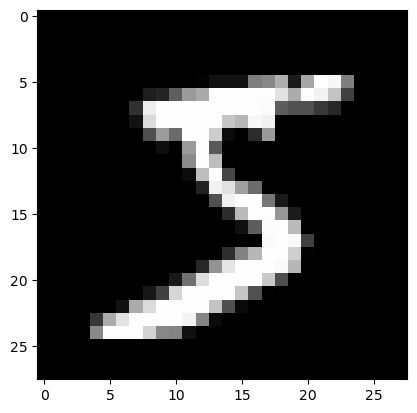

In [8]:
plt.imshow(x_train[0], cmap='gray', interpolation='none')



<font color="red">**PAUSE:  When you reach here, start to think about what we need to do to make correct prediction.**</font>

We have the following codes without any comments. Let us discuss the following codes to figure out what is happening here. 

## Objective (Loss) Function

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [10]:
loss_fn(y_train[:1], predictions).numpy()

2.6740932

## Optimization

In [11]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Training

In [12]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2582 - accuracy: 0.9262
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1142 - accuracy: 0.9663
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0777 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0581 - accuracy: 0.9816
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0445 - accuracy: 0.9862


## Testing

In [13]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0788 - accuracy: 0.9760 - 800ms/epoch - 3ms/step


[0.07875847816467285, 0.9760000109672546]

In [14]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [15]:
probs = probability_model(x_test[:10])
probs

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[6.77614409e-08, 6.84695634e-10, 1.72135278e-05, 6.09665221e-05,
        1.04123953e-10, 2.81672641e-09, 4.59526384e-12, 9.99920130e-01,
        3.27231362e-08, 1.61853552e-06],
       [6.14129476e-07, 1.46425073e-05, 9.99940395e-01, 4.31527042e-05,
        4.41032819e-15, 3.72942068e-08, 2.50276901e-08, 7.17314142e-12,
        1.21284017e-06, 4.61381286e-14],
       [4.17611687e-07, 9.98131812e-01, 1.82450720e-04, 6.45234977e-05,
        2.23491705e-04, 9.04017361e-06, 2.46271957e-04, 7.61909352e-04,
        3.78791738e-04, 1.24699363e-06],
       [9.99995351e-01, 8.75952696e-12, 2.53178723e-06, 4.34676206e-09,
        3.04150427e-10, 3.08264703e-08, 8.28519688e-08, 1.86090188e-06,
        5.14373995e-11, 1.09055684e-07],
       [8.28487032e-07, 1.34193726e-10, 8.00864257e-07, 3.83585519e-09,
        9.98035848e-01, 1.58577169e-08, 5.05788830e-06, 8.70506756e-06,
        3.88294659e-08, 1.94880553e-03],
       [2.17342873e-08, 9

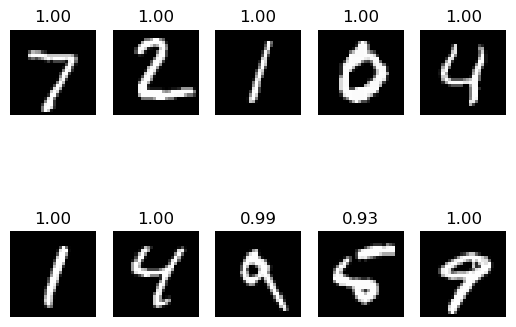

In [16]:
fig = plt.figure()
plt.tight_layout()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i], cmap='gray', interpolation='none')
    plt.title("{:.2f}".format(max(probs[i])))
    plt.axis('off')